# Part 5 of Quick Start: Histograms

This page is primarily based on the following page at the Circos documentation site:

- [5. HISTOGRAMS](http://circos.ca/documentation/tutorials/quick_start/histograms/)

That page is found as part number 5 of the nine part [the 'QUICK START' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).

Go back to Part 4 by clicking [here &#8592;](Quick_Start_Part4.ipynb).

----



## Histograms

This is the fifth step in the series of nine Quick Guide tutorials. 

A histogram is the second data track Martin illustrates adding in the Quick Start documentation.

The following is adapted from the documentation page:

In addition to links, which associate two genomic positions, Circos supports several data tracks, which associate a position with a value.

These tracks include line plots, scatter plots, histograms and heat maps. The text track is a special kind of data track, which associates a position with a text label.

### DATA FORMAT

The line plot, scatter plot, heat map and histogram share the same data format.

```ini
#chr start end value [options]
...
hs3 196000000 197999999 71.0000
hs3 198000000 199999999 57.0000
hs4 0 1999999 28.0000
hs4 2000000 3999999 40.0000
hs4 4000000 5999999 59.0000
...
```

The `options` field can associate a parameter with a data point, such as a color or identifier. Format parameters are used to override how the data point is displayed (e.g. instead of using rules)

```ini
hs3 196000000 197999999 71.0000 fill_color=blue
```

User parameters, such as `id` can be used in conjunction with rules to select and modify the data point.

```ini
# in data file
hs3 196000000 197999999 71.0000 id=abc

# in rule block
<rule>
condition  = var(id) eq "abc"
fill_color = blue
</rule>
```

### PLOT BLOCKS

Each histogram is defined in a `<plot>` block within an enclosing `<plots>` block.

```ini
<plots>

<plot>
type = histogram
...
</plot>

<plot>
type = histogram
...
</plot>

...
</plots>
```

### HISTOGRAMS

This tutorial defines two histograms: a regular histogram and a stacked histogram.

In addition to the `type` and `file` parameters, you need to define the inner and outer radius of the track using `r0` and `r1`. Usually these values are relative — in case the radial position of the ideogram changes, the track will be automatically moved.

```ini
type = histogram
file = data/5/segdup.hs1234.hist.txt
r1   = 0.88r
r0   = 0.81r
```

### JOINING BINS

A histogram is composed of bins. If the bins do not abut, such as in the case:

```ini
hs1 10 20 0.5
hs1 30 40 0.25
```

You have the option of extending the bins outward until they meet their neighbour.

```ini
extend_bin = no | yes
```

### FILL AND OUTLINE COLORS

Histograms can have both a fill and outline. In this example, the bins will be filled a very dark grey. 

```ini
fill_color = vdgrey
```

All tracks have default formatting settings, defined in `etc/tracks/*.conf`. For the histogram, the defaults are

```ini
# etc/tracks/histogram.conf
color            = black
thickness        = 1
r1               = 0.89r
r0               = 0.8r
orientation      = out
```

### HISTOGRAM ORIENTATION

A histogram can be oriented out or in.

```ini
orientation = in | out
```

### MANAGING DEFAULTS

To turn off default outline, set the outline thickness to zero.

```ini
thickness = 0p
```

or undefine the parameter

```ini
thickness = undef
```

You can edit the defaults by editing the `etc/tracks/histogram.conf` file, or permanently disable the use of defaults by commenting out the `track_default` directory in `etc/housekeeping.conf`.

### RULES

Like for links, rules are used to dynamically alter formatting of each data point (i.e. histogram bin). In this tutorial, Martin includes a rule that hides histogram bins on chromosome hs1.

```ini
<rule>
condition = on(hs1)
show      = no
</rule>
```

#### IMPORTING RULES

Because the rule is reused, I store this rule in a file, `exclude.hs1.rule`, and then import it

```ini
<rules>
<<include exclude.hs1.rule>>
</rules>
```

#### CHANGING FORMAT PARAMETERS


Rules can change the visibility, format and value of data points. For example, by setting `show=no`, as in the rule above, a data point is hidden.

Similarly you can set any format parameter

```ini
<rule>
condition  = on(hs1)
fill_color = blue
color      = vdblue
thickness  = 2p
</rule>
```

The rule will overwrite any parameter values from the `<plot>` block.
    
#### RULE CONDITIONS

The condition in a rule is expected to be Perl code. This expression is automatically evaluated — you do not need `eval()` here. Examples of conditions are

```perl
# applies to every data point - always true
1

# check whether a data point is on a chromosome
var(chr) eq "hs1"
on(hs1) # shortcut

# check whether a data point is not on a chromosome
var(chr) ne "hs1"
!on(hs1)

# combine tests with or (||)
on(hs1) || on(hs2)
var(chr) =~ /hs(1|22)$/;

# check position
var(start) > 10Mb

# use the value
var(value) < 0.05

# use any parameter
var(color) eq "red"
var(stroke_color) eq "vdred"
```

If a rule has multiple conditions, all of them must be satisfied for the rule to trigger.

```ini
<rule>
# data point must be on hs1 and value < 0.05
condition = on(hs1)
condition = var(value) < 0.05
...
</rule>
```

#### REFERENCING DATA POINT PARAMETERS IN RULES

You can reference parameters defined in the data file using `var(X)` For example, you can define parameters `id` and `mult` in the data file

```perl
# in data file
hs3 196000000 197999999 71.0000 id=abc,mult=5
```

and then use them in a rule

```ini
<rule>
condition  = var(id) eq "abc"
fill_color = blue
value      = eval(var(value)*var(mult))
</rule>
```

The `value` parameter refers to the data point's value. Yes, it is possible to change the value using a rule! Here we multiply the value by the data point's `mult` parameter.

In order for the expression to be evaluated as code, it must be enclosed in `eval()` (otherwise the `value` will be set to the string `"var(value)*var(mult)"`).

### STACKED HISTOGRAMS

The second histogram in the tutorial is a stacked histogram. It shows several values for a given position by stacking bins. This is a special kind of 2D data track which uses the data format

```ini
#chr start end value,value,value,... [options]
...
hs3 196000000 197999999 0.0000,7.0000,64.0000,0.0000
hs3 198000000 199999999 21.0000,6.0000,18.0000,12.0000
hs4 0 1999999 5.0000,3.0000,1.0000,19.0000
hs4 2000000 3999999 1.0000,6.0000,16.0000,17.0000
hs4 4000000 5999999 1.0000,13.0000,25.0000,20.0000
...
```

Circos will automatically format the track as a stacked histogram when type=histogram and multiple values in the data file are found.

The `fill_color` for a stacked histogram is expected to be a list of colors, each corresponding to a given value. For example, for the data line

```ini
hs3 198000000 199999999 21.0000,6.0000,18.0000,12.0000
```

and the `fill_color` list

```ini
fill_color  = hs1,hs2,hs3,hs4
```

the colors for the bins will be hs1 (21.0000), hs2 (6.0000), hs3 (18.0000), hs4 (12.0000).



----

### Generating the plot produced by this example code

The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/1/5/

/home/jovyan/circos-tutorials-0.67/tutorials/1/5


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.29s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.30s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/1/5
debuggroup summary 0.30s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.30s loading configuration from file circos.conf
debuggroup summary 0.30s found conf file circos.conf
debuggroup summary 0.49s debug will appear for these features: output,summary
debuggroup summary 0.49s bitmap output image ./circos.png
debuggroup summary 0.49s SVG output image ./circos.svg
debuggroup summary 0.49s parsing karyotype and organizing ideograms
debuggroup summary 0.59s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.59s applying global and local scaling
debuggroup summary 0.62s allocating image, colors and brushes
debuggroup summary 2.40s drawing 4 ideograms of total size 881,626,704
debuggroup summary 2.40s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 23512.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 24150.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

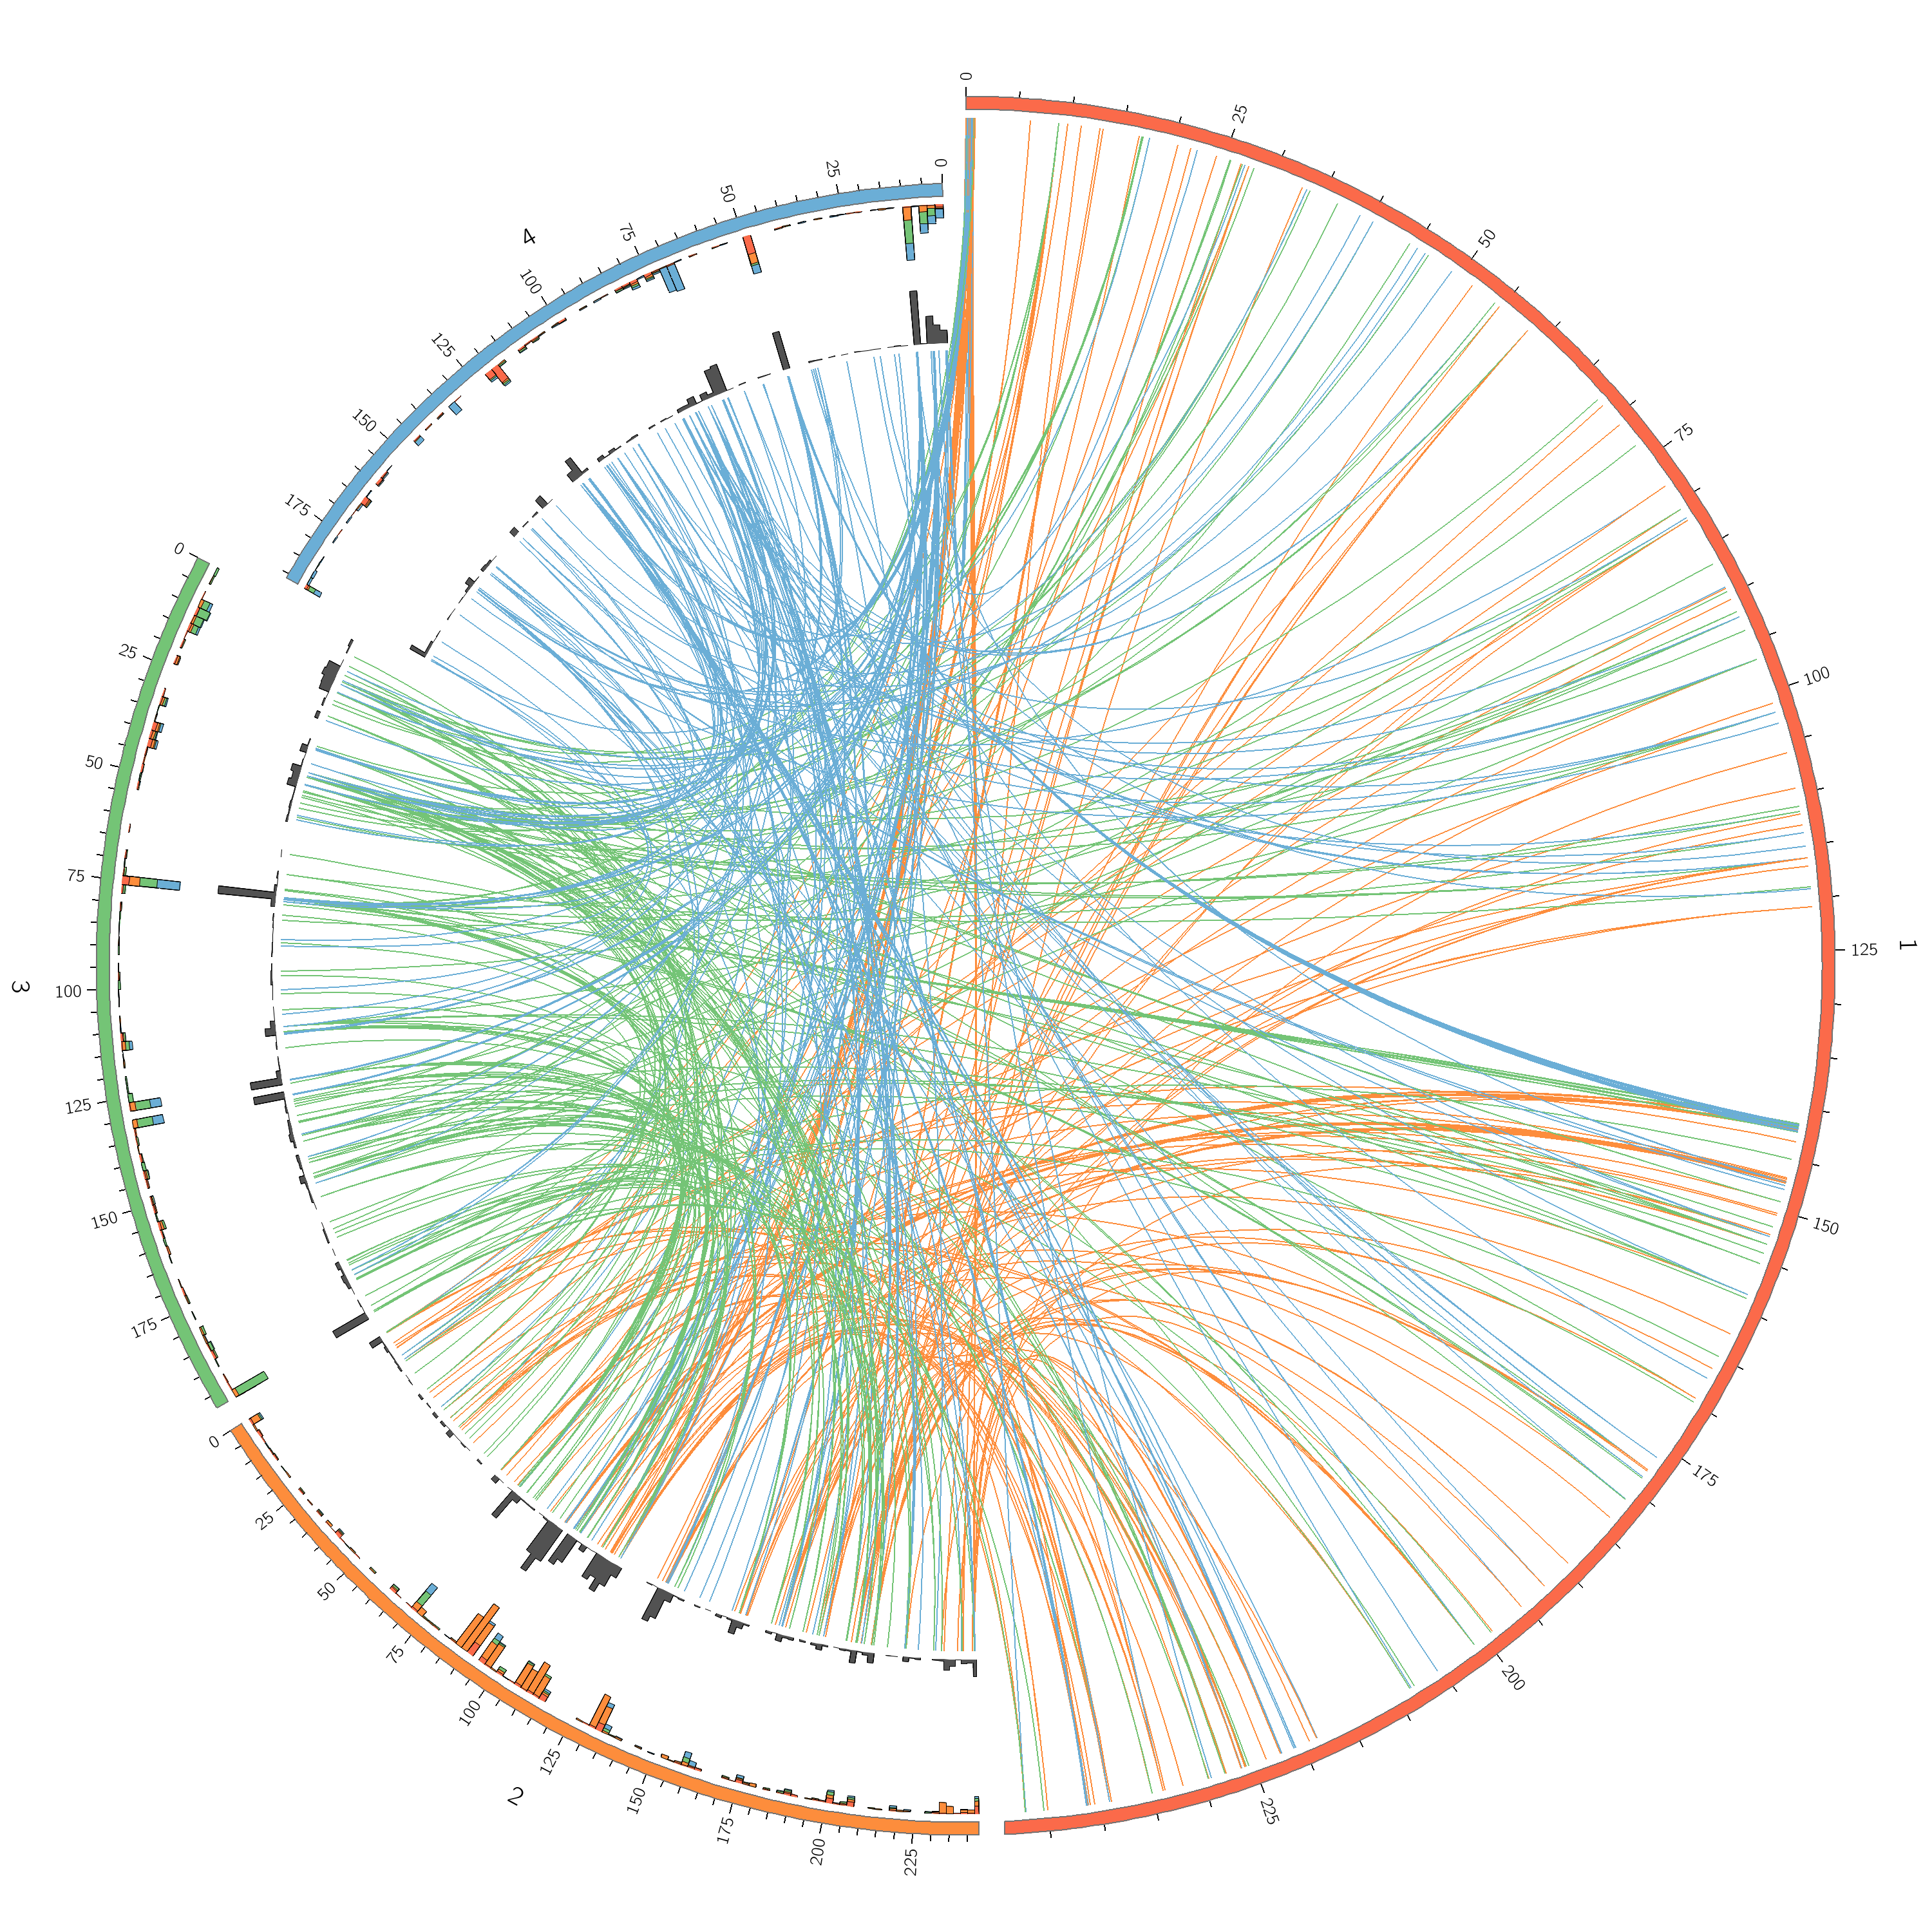

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Quick Start series by clicking [here &#10145;](Quick_Start_Part6.ipynb)</font>. 

----